#### Image Processing Libraries
Among various image processing libraries, `CV2`, `numpy`, and `pyplot` will be mainly used throughout the series.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# What is an image?
## Grayscale Image

- A grayscale photograph can be seen as a function that maps spatial location to *intensity*
- Intensity can be represented as a number between 0 and 1
    - 0 is black
    - 1 is white
- $ f : \mathbb{R}^2 \rightarrow [0,1]$

In [2]:
img_loc = 'assets/sample_image_01_1.png'

In [3]:
img = cv2.imread(img_loc, cv2.IMREAD_GRAYSCALE)

In [4]:
print("The intensity of the first pixel in the image is : " + str(img[0][0]))

The intensity of the first pixel in the image is : 0


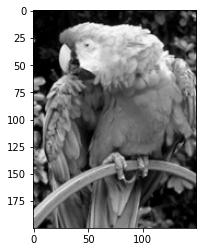

In [5]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [6]:
height, width = img.shape

In [7]:
print("The height of the image is %d pixels" % height)
print("The width of the image is %d pixels" % width)

The height of the image is 200 pixels
The width of the image is 150 pixels


`img.shape` indicates that the image is of 150 × 200 pixels

## Color Image
- A color image can also be seen as a function that maps spatial location to intensity
- Represent color with channels (layers representing the intensity of different colors)
    - (R,G,B) is the most commonly used channel
    - Records how much red, green, blue light is needed
- $ f : \mathbb{R}^2 \rightarrow [0,1]^3$

In [8]:
img2_loc = 'assets/sample_image_01_2.png'
img2 = cv2.imread(img2_loc)[:,:,::-1] # BGR → RGB

In [9]:
cv2.imread(img2_loc)[0][0]

array([138,  77,  22], dtype=uint8)

In [10]:
print("The intensity of the first pixel in the image is : " + str(img2[0][0]))

The intensity of the first pixel in the image is : [ 22  77 138]


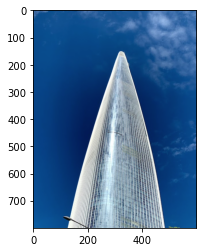

In [11]:
plt.imshow(img2, vmin=0, vmax=255)
plt.show()

In [12]:
height, width, channels = img2.shape

In [13]:
print("The height of the image is %d pixels" % height)
print("The width of the image is %d pixels" % width)
print("The number of channels of the image is %d" % channels)

The height of the image is 800 pixels
The width of the image is 600 pixels
The number of channels of the image is 3


**Representation of an image**
- Great as a mathematical abstraction
- computers cannot represent arbitrary functions
- Digital image: Record only the intensities / colors of a finite grid of locations
- Can be represented as a 2D array (grayscale images) or 3D array (color images)
- Grayscale images: H × W array (H rows and W columns; H × W matrix)
- Color images: H × W array
- Each grid location is called a pixel

**Intensity**
- Frequently, intensities and colors are not *real numbers* between 0 and 1
- Instead, they are integers between 0 and 255
- Integers are easy to store than floating point numbers: 8 bits per pixel (grayscale) or 24 bits per pixel

# Image Processing
"The first stage in most computer vision algorithms, namely the use of image processing to preprocess the image and convert it into a form suitable for further analysis" (Szeliski, 2021)

## Image Processing / Low-level Computer Vision
- Clean up image
- Identify primitives for future processing

## Image as functions
- Can think of image as a **function** $f$, from coordinates to values:
     - Grayscale: $f(x,y)$ gives the **intensity** at position $(x,y)$
         - $f: [a,b] \times [c,d] \rightarrow \mathbb{R}$
     - Color: $f(x,y) = [r(x,y), g(x,y), b(x,y)]$

## Operations on images
- Geometric manipulations
     - $f'(x,y) = f(T(x,y))$
     - Examples
         - $f'(x,y) = f(y,x)$ **rotates** the images by 90°
         - $f'(x,y) = g(f(x,y))$ **transforms appearance**

In [14]:
# Rotation

In [15]:
# Appearance transformations f'(x,y) = (1 if f(x,y) > 122 else 0)

### Operations on a particularly bad image
Consider a photo taken in dark condition. We would want to:
- Brighten image
    - add some value to all pixels
        - $f'(x,y) = f(x,y) + 127$
- Increase contrast
    - multiply some value to all pixels
        - $f'(x,y) = 10f(x,y)$